# Playing with the dummy files to create a graphing script

In [1]:
from LSMemoryModel.utils.plots import plot_ci

-f


In [3]:
sweep = {
"context_epsilon" : [0, 0.01, 0.05, 0.1, 0.2],
"num_actions" : [10, 100, 1000, 10000],
"num_contexts" : [1, 2, 5, 10],
"stm_learning": [0.001, 0.01, 0.1, 1],
"beta": [0.01, 0.1, 1, 10]
}

# Reward epsilon param sweep: 0.01, 0.1, 0.5
# combine beta into learning rate...start LR at 0.1 -> 100
# Ditch high context epsilon cap at 0.1
# Ditch actions over 1000
# nan catch for plotting script
# perhaps reduce num trials
# LTM run -> ?

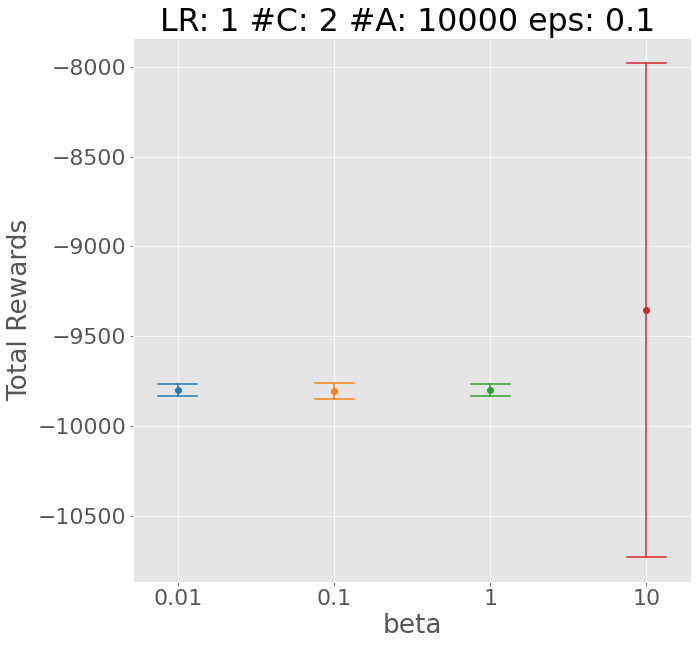

In [48]:
plot_ci(
            stm_learning_rate=1, 
            num_contexts=2,
            num_actions=1000, 
            context_epsilon=0.1,
            beta=None,
            save=False,
            folder=None
    )